In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/home/user/Документы/Projects/Python/pml/assessment/wdbc.data')
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [2]:
le.transform(['M', 'B'])

array([1, 0])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print(f'Правильность при испытании: {pipe_lr.score(X_test, y_test)}')

Правильность при испытании: 0.9298245614035088


In [5]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Блок: %2d, Распределение классов: %s, Правильность: %.3f' % (k + 1, np.bincount(y_train[train]), score))

Блок:  1, Распределение классов: [256 152], Правильность: 0.913
Блок:  2, Распределение классов: [256 152], Правильность: 0.935
Блок:  3, Распределение классов: [256 152], Правильность: 0.957
Блок:  4, Распределение классов: [256 152], Правильность: 0.891
Блок:  5, Распределение классов: [257 152], Правильность: 0.978
Блок:  6, Распределение классов: [257 152], Правильность: 0.978
Блок:  7, Распределение классов: [257 152], Правильность: 0.978
Блок:  8, Распределение классов: [257 152], Правильность: 0.911
Блок:  9, Распределение классов: [257 152], Правильность: 0.933
Блок: 10, Распределение классов: [256 153], Правильность: 0.978


In [6]:
print('\nТочность перекрестной проверки: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Точность перекрестной проверки: 0.945 +/- 0.031


In [7]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('Меры правильности перекрестной проверки: %s' % scores)

Меры правильности перекрестной проверки: [0.91304348 0.93478261 0.95652174 0.89130435 0.97777778 0.97777778
 0.97777778 0.91111111 0.93333333 0.97777778]


In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('Mepы правильности перекрестной проверки: %s' % scores)

Mepы правильности перекрестной проверки: [0.91304348 0.93478261 0.95652174 0.89130435 0.97777778 0.97777778
 0.97777778 0.91111111 0.93333333 0.97777778]


In [9]:
print('Точность перекрестной проверки: %.3f + /- %.3f '
      % (np.mean(scores),
         np.std(scores)))

Точность перекрестной проверки: 0.945 + /- 0.031 


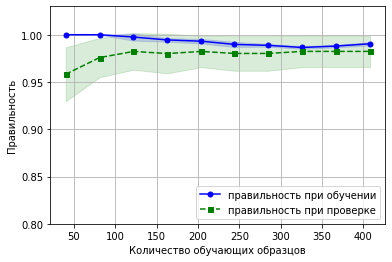

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='правильность при обучении')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
         label='правильность при проверке')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Количество обучающих образцов')
plt.ylabel('Правильность')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

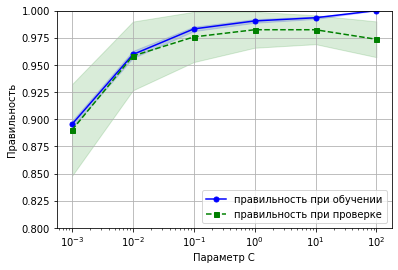

In [16]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                             param_name='logisticregression__C', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='правильность при обучении')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5,
         label='правильность при проверке')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Параметр С')
plt.ylabel('Правильность')
plt.ylim([0.8, 1.0])
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9779710144927536
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [24]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Правильность при испытании: %.3f' % clf.score(X_test, y_test))

Правильность при испытании: 0.965


In [25]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('Точность перекрестной проверки: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Точность перекрестной проверки: 0.978 +/- 0.012


In [26]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3,
                                             4, 5, 6,
                                             7, None]}],
                  scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('Точность перекрестной проверки: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Точность перекрестной проверки: 0.932 +/- 0.017


In [27]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[72  0]
 [ 5 37]]


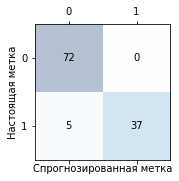

In [30]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Спрогнозированная метка')
plt.ylabel('Настоящая метка')
plt.show()

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Точность: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Полнота: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('Mepa Fl: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Точность: 1.000
Полнота: 0.881
Mepa Fl: 0.937


In [35]:
from sklearn.metrics import make_scorer, f1_score

c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9828077166509601
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


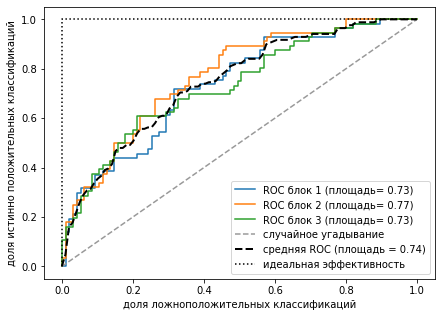

In [42]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))
X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3, random_state=1, shuffle=True).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC блок %d (площадь= %0.2f)'
                   % (i + 1, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='случайное угадывание')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='средняя ROC (площадь = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='идеальная эффективность')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('дoля ложноположительных классификаций')
plt.ylabel('доля истинно положительных классификаций')
plt.legend(loc="lower right")
plt.show()